#**Classificação: Resolvendo problemas multiclasse**

##**Aula 1 - Conhecendo os dados**

###**Carregando os dados**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/classificacao_multiclasse/main/Dados/dados_estudantes.csv')

In [ ]:
df.head()

In [ ]:
df.info()

###**Entendendo os dados**

In [ ]:
df['Target'].unique()

##**Aula 2 - Explorando os dados**

###**Dados demográficos**

* Estado civil
* Migração
* Sexo
* Idade na inscrição
* Estrangeiro

In [ ]:
df['Estado civil'].value_counts(normalize = True)*100

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.displot(df['Idade na matrícula'], bins=20)
plt.show()

In [ ]:
color_dict = {'Desistente': '#e34c42','Graduado': '#4dc471', 'Matriculado': '#3b71db'}

# Definindo a paleta de cores
sns.set_palette(list(color_dict.values()))

In [ ]:
sns.displot(data=df, x='Idade na matrícula', hue='Target', kind='kde', fill=True)
plt.title('Distribuição de Idade por Target')
plt.show()

In [ ]:
df['Estrangeiro'].value_counts(normalize = True)*100

In [ ]:
df['Sexo'].value_counts(normalize = True)*100

In [ ]:
sns.countplot(x='Sexo', hue='Target', data=df)
plt.show()

###**Dados socioeconômicos e macroeconômicos**

**Socioeconômicos**
* Necessidades educacionais especiais
* Devedor
* Taxas de matrícula em dia
* Bolsista

**Macroeconômicos**
* Taxa de desemprego
* Taxa de inflação
* PIB

In [ ]:
sns.countplot(x='Devedor', hue='Target', data=df)
plt.show()

In [ ]:
sns.countplot(x='Taxas de matrícula em dia', hue='Target', data=df)
plt.show()

In [ ]:
sns.countplot(x='Bolsista', hue='Target', data=df)
plt.show()

###**Dados no momento da matrícula**

* Curso
* Período
* Qualificação prévia

In [ ]:
import plotly.express as px

In [ ]:
# Calcula as contagens das combinações Curso-Target
contagem = df.groupby(["Curso", "Target"]).size().reset_index(name="Contagem")

# Calcula as porcentagens
contagem['Porcentagem'] = contagem.groupby("Curso")["Contagem"].transform(lambda x: (x / x.sum()) * 100)

# Cria o gráfico interativo
fig = px.bar(contagem, y='Curso', x='Porcentagem', color='Target', orientation='h',
             color_discrete_map={'Desistente': '#e34c42', 'Graduado': '#4dc471', 'Matriculado': '#3b71db'})

# Mostra o gráfico
fig.show()

###**Dados acadêmicos**

* disciplinas creditadas
* disciplinas matriculadas
* disciplinas avaliações
* disciplinas aprovadas
* disciplinas notas
* disciplinas sem avaliações
* disciplinas faltas

In [ ]:
sns.boxplot(x='Target', y='disciplinas 1º semestre (notas)', data=df)
plt.show()

In [ ]:
sns.boxplot(x='Target', y='disciplinas 2º semestre (notas)', data=df)
plt.show()

In [ ]:
df['Target'].value_counts(normalize = True)*100

##**Aula 3 - Realizando o treinamento**

###**Preparando os dados**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

colunas_categoricas = ['Migração', 'Sexo','Estrangeiro', 'Necessidades educacionais especiais', 'Devedor',
                     'Taxas de matrícula em dia', 'Bolsista', 'Período','Estado civil', 'Curso', 'Qualificação prévia']

# Selecionando apenas as colunas categóricas do dataframe
df_categorico = df[colunas_categoricas]

# Inicializando o OneHotEncoder
encoder = OneHotEncoder(drop='if_binary')

# Ajustando e transformando os dados, criando um novo dataframe com as colunas codificadas
df_encoded = pd.DataFrame(encoder.fit_transform(df_categorico).toarray(),
                          columns=encoder.get_feature_names_out(colunas_categoricas))

# Combinando as colunas codificadas com as colunas não codificadas do dataframe original
df_final = pd.concat([df.drop(colunas_categoricas, axis=1), df_encoded], axis=1)


In [ ]:
df_final.head()

###**Separando os dados**

In [ ]:
X = df_final.drop('Target', axis=1)
y = df_final['Target']

In [ ]:
from sklearn.model_selection import train_test_split

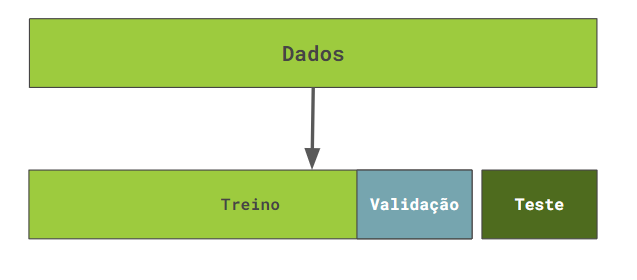

In [ ]:
X, X_teste, y, y_teste = train_test_split(X, y, test_size=0.15, stratify=y, random_state=0)
X_treino, X_val, y_treino, y_val = train_test_split(X, y, stratify=y, random_state=0)

###**Treinando o modelo com Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
modelo_rf = RandomForestClassifier(random_state=0)
modelo_rf.fit(X_treino, y_treino)
y_pred = modelo_rf.predict(X_val)
print(f'Acurácia de treino: {modelo_rf.score(X_treino, y_treino)}')
print(f'Acurácia de validação: {modelo_rf.score(X_val, y_val)}')

In [ ]:
modelo_rf = RandomForestClassifier(random_state=0, max_depth=10)
modelo_rf.fit(X_treino, y_treino)
y_pred = modelo_rf.predict(X_val)
print(f'Acurácia de treino: {modelo_rf.score(X_treino, y_treino)}')
print(f'Acurácia de validação: {modelo_rf.score(X_val, y_val)}')

##**Aula 4 - Avaliando o modelo**

###**Analisando a matriz de confusão**

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
matriz_confusao = confusion_matrix(y_val, y_pred)

In [ ]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix= matriz_confusao)
visualizacao.plot();

In [ ]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix= matriz_confusao, display_labels=modelo_rf.classes_)
visualizacao.plot();

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize = 'true', cmap = 'Blues');

###**Analisando o relatório de métricas**

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
report = classification_report(y_val, y_pred)
print("Relatório de Classificação:\n", report)

###**Aplicando a técnica de superamostragem**

In [ ]:
y_treino.value_counts()

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
oversample = SMOTE(random_state=0)
X_balanceado, y_balanceado = oversample.fit_resample(X_treino, y_treino)

In [ ]:
y_balanceado.value_counts()

In [ ]:
modelo = RandomForestClassifier(random_state=0, max_depth=10)
modelo.fit(X_balanceado, y_balanceado)
y_pred = modelo.predict(X_val)

###**Analisando as métricas após o balanceamento**

In [ ]:
print(classification_report(y_val, y_pred))
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize='true', cmap='Blues');

##**Aula 5 - Validando o modelo**

###**Pipeline para validação**

In [ ]:
from imblearn.pipeline import Pipeline as imbpipeline

In [ ]:
modelo = RandomForestClassifier(max_depth = 10)
pipeline = imbpipeline([('oversample', SMOTE()), ('floresta', modelo)])

In [ ]:
from sklearn.model_selection import cross_validate, StratifiedKFold

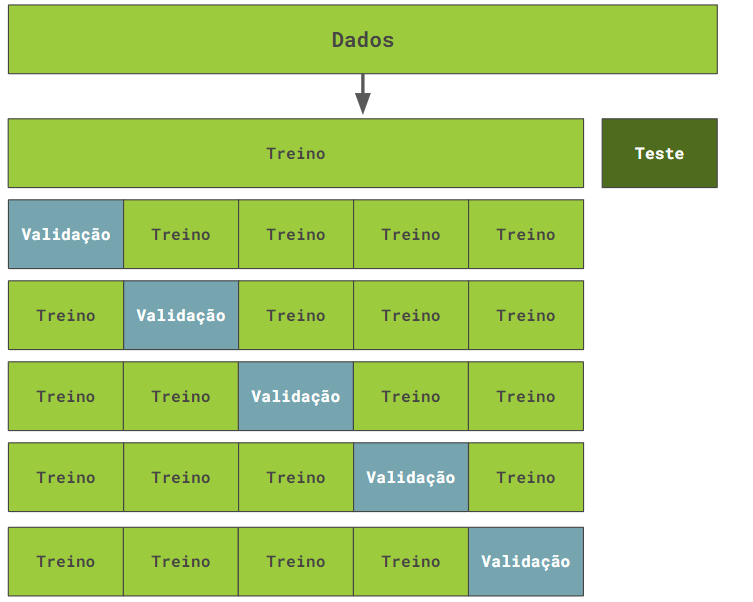

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring='recall_weighted')
cv_resultados['test_score']

In [ ]:
# Intervalo de confiança
media = cv_resultados['test_score'].mean()
desvio_padrao = cv_resultados['test_score'].std()
print(f'Intervalo de confiança: [{media-2*desvio_padrao}, {min(media+2*desvio_padrao, 1.0)}]')

###**Testando o modelo**


In [ ]:
oversample = SMOTE(random_state=0)
X_balanceado, y_balanceado = oversample.fit_resample(X, y)
modelo = RandomForestClassifier(random_state=0, max_depth=10)
modelo.fit(X_balanceado, y_balanceado)
y_pred = modelo.predict(X_teste)

print(classification_report(y_teste, y_pred))
ConfusionMatrixDisplay.from_predictions(y_teste, y_pred, normalize='true', cmap='Blues');